In [1]:
import pandas as pd
df = pd.read_csv("austin_weather.csv")
print("First 5 rows of the DataFrame:")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))
print("\nInformation about the DataFrame:")
print(df.info())
print("\nDescriptive statistics of the DataFrame:")
print(df.describe().to_markdown(numalign="left", stralign="left"))

First 5 rows of the DataFrame:
| Date       | TempHighF   | TempAvgF   | TempLowF   | DewPointHighF   | DewPointAvgF   | DewPointLowF   | HumidityHighPercent   | HumidityAvgPercent   | HumidityLowPercent   | SeaLevelPressureHighInches   | SeaLevelPressureAvgInches   | SeaLevelPressureLowInches   | VisibilityHighMiles   | VisibilityAvgMiles   | VisibilityLowMiles   | WindHighMPH   | WindAvgMPH   | WindGustMPH   | PrecipitationSumInches   | Events              |
|:-----------|:------------|:-----------|:-----------|:----------------|:---------------|:---------------|:----------------------|:---------------------|:---------------------|:-----------------------------|:----------------------------|:----------------------------|:----------------------|:---------------------|:---------------------|:--------------|:-------------|:--------------|:-------------------------|:--------------------|
| 2013-12-21 | 74          | 60         | 45         | 67              | 49             | 43         

In [2]:
import numpy as np
columns_to_convert = [
    'DewPointHighF', 'DewPointAvgF', 'DewPointLowF',
    'HumidityHighPercent', 'HumidityAvgPercent', 'HumidityLowPercent',
    'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches', 'SeaLevelPressureLowInches',
    'VisibilityHighMiles', 'VisibilityAvgMiles', 'VisibilityLowMiles',
    'WindHighMPH', 'WindAvgMPH', 'WindGustMPH', 'PrecipitationSumInches'
]

for col in columns_to_convert:
    df[col] = df[col].replace(['T', '-'], np.nan)
    df[col] = pd.to_numeric(df[col])

df['Date'] = pd.to_datetime(df['Date'])

for col in columns_to_convert:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mean())

print("\nData types after conversion and imputation:")
print(df.info())

# Check for any remaining missing values
print("\nMissing values after cleaning:")
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))


Data types after conversion and imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        1319 non-null   datetime64[ns]
 1   TempHighF                   1319 non-null   int64         
 2   TempAvgF                    1319 non-null   int64         
 3   TempLowF                    1319 non-null   int64         
 4   DewPointHighF               1319 non-null   float64       
 5   DewPointAvgF                1319 non-null   float64       
 6   DewPointLowF                1319 non-null   float64       
 7   HumidityHighPercent         1319 non-null   float64       
 8   HumidityAvgPercent          1319 non-null   float64       
 9   HumidityLowPercent          1319 non-null   float64       
 10  SeaLevelPressureHighInches  1319 non-null   float64       
 11  SeaLevelPre


Mean Squared Error (MSE): 0.11
R-squared (R2): 0.10

Model Coefficients:
TempAvgF: -0.0015
HumidityAvgPercent: 0.0127
WindAvgMPH: 0.0112
Intercept: -0.6649


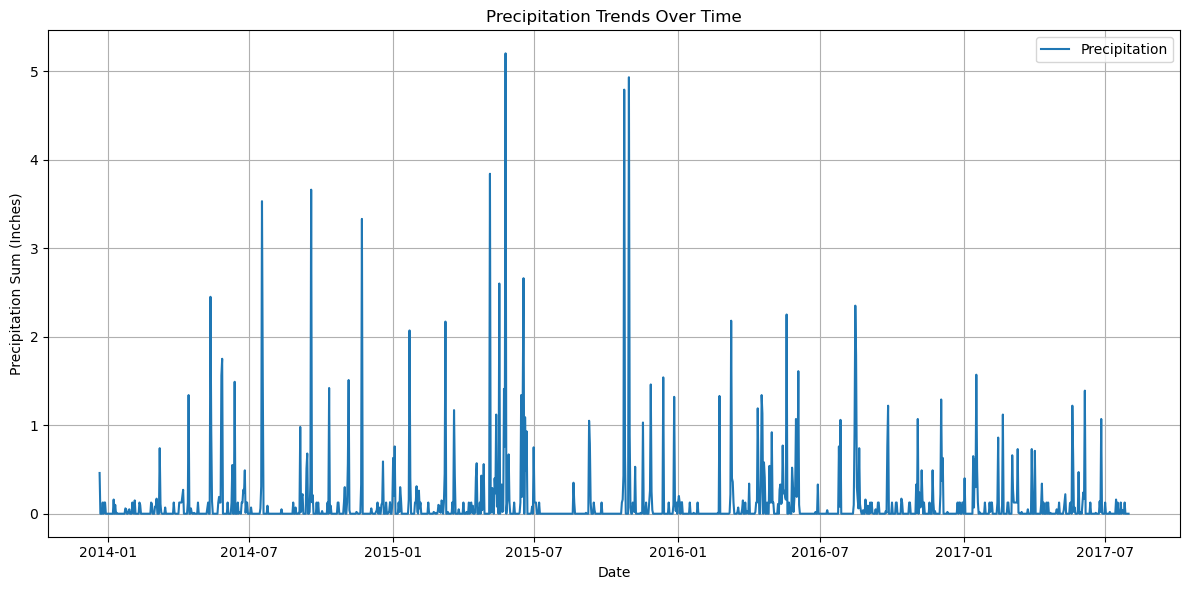

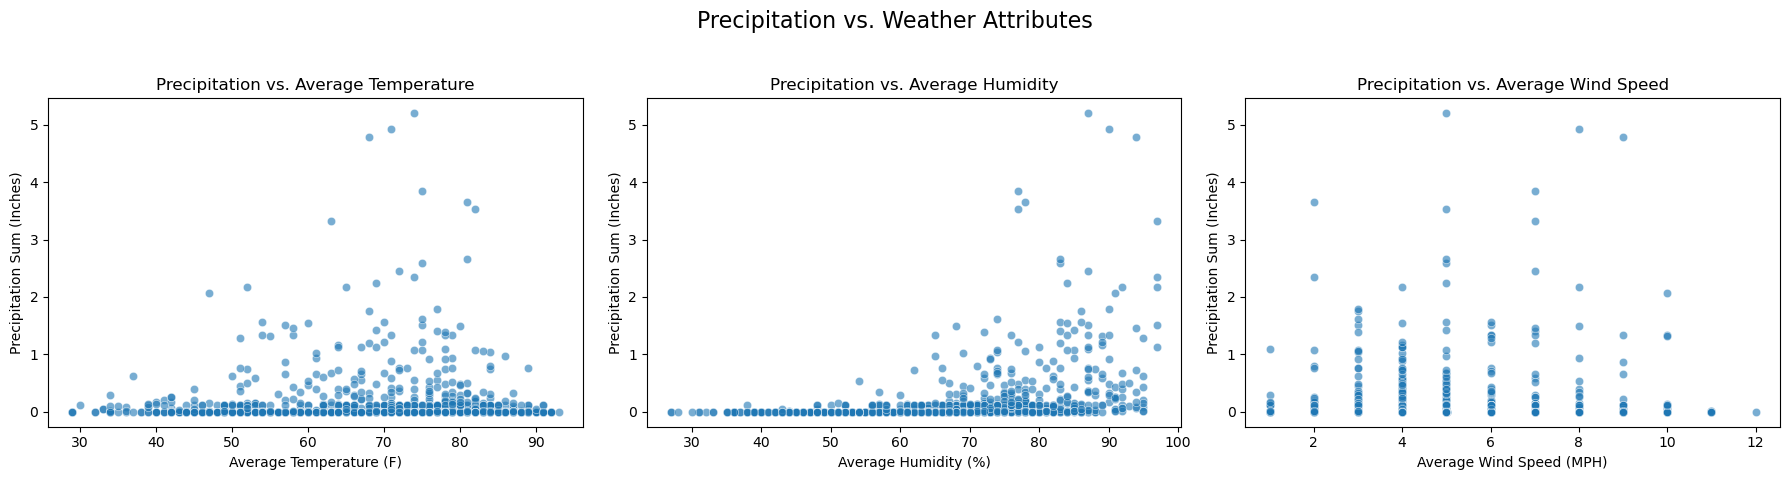

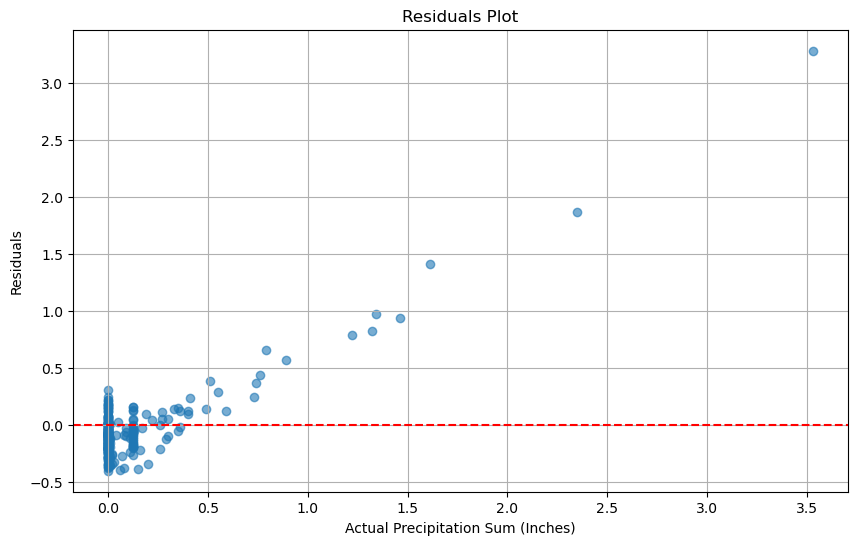

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Select features (X) and target (y)
features = ['TempAvgF', 'HumidityAvgPercent', 'WindAvgMPH']
target = 'PrecipitationSumInches'

X = df[features]
y = df[target]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Display the coefficients of the model
print("\nModel Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

# Visualize precipitation trends over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['PrecipitationSumInches'], label='Precipitation')
plt.title('Precipitation Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation Sum (Inches)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Visualize correlation with features using scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Precipitation vs. Weather Attributes', fontsize=16)

sns.scatterplot(ax=axes[0], x=df['TempAvgF'], y=df['PrecipitationSumInches'], alpha=0.6)
axes[0].set_title('Precipitation vs. Average Temperature')
axes[0].set_xlabel('Average Temperature (F)')
axes[0].set_ylabel('Precipitation Sum (Inches)')

sns.scatterplot(ax=axes[1], x=df['HumidityAvgPercent'], y=df['PrecipitationSumInches'], alpha=0.6)
axes[1].set_title('Precipitation vs. Average Humidity')
axes[1].set_xlabel('Average Humidity (%)')
axes[1].set_ylabel('Precipitation Sum (Inches)')

sns.scatterplot(ax=axes[2], x=df['WindAvgMPH'], y=df['PrecipitationSumInches'], alpha=0.6)
axes[2].set_title('Precipitation vs. Average Wind Speed')
axes[2].set_xlabel('Average Wind Speed (MPH)')
axes[2].set_ylabel('Precipitation Sum (Inches)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Visualize the residuals to check model performance visually
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_test, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Actual Precipitation Sum (Inches)')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()